In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.fftpack import dct, idct
from typing import Tuple

tf.config.run_functions_eagerly(True)

In [9]:
def dct2(a):
    '''
    Computes the 2-dimensional discrete cosine transform of a.
    Parameters
    ----------
    a : array_like
        Input array to compute the DCT on.
    Returns
    -------
    out : ndarray
        DCT2(a)    
    '''
    return dct(dct( a, axis=0), axis=1, norm='ortho')

def idct2(a):
    '''
    Computes the 2-dimensional inverse discrete cosine transform of a.
    Parameters
    ----------
    a : array_like
        Input array to compute the IDCT on.
    Returns
    -------
    out : ndarray
        IDCT2(a)    
    '''
    return idct(idct( a, axis=0), axis=1, norm='ortho')

def signature_activation(model, img):
    '''
    Computes the signature activation of a given image.
    Parameters
    ----------
    model : keras model
        The model to compute the signature activation on.
        The model must output the activations of the last convolutional layer.
    img : array_like
        Input image to compute the signature activation on.
    Returns
    -------
    out : ndarray
        Signature activation of the input image.    
    '''
    # obtain the activations of the last convolutional layer
    conv_output, _ = model.predict(img, verbose=0)
    conv_output =  conv_output[0]

    # number of filters in the last convolutional layer
    num_filters = conv_output.shape[-1]
    
    # compute the signature of each channel
    frames_filters_signatures =  [
        idct2(np.sign(dct2(conv_output[...,i])))**2 for i in range(num_filters) 
    ]
    
    # compute the mean
    activations = np.array(frames_filters_signatures)
    activations = np.mean(activations, axis=0)

    # normalize the map
    activations = 255*(activations - np.min(activations)) / (np.max(activations) - np.min(activations))
    return activations


In [3]:
def read_and_resize_image(image_path: str, size: Tuple[int, int]) -> Tuple:
    '''
    Reads and resizes an image.
    Parameters
    ----------
    image_path : str
        Path to the image.
    size : tuple
        Size of the image.
    Returns
    -------
    out : tuple
        Resized image.    
    '''
    # Load the image
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, size)
    return resized_image

# We set the size for the images as input to the model
size = (224, 224)


In [4]:
# Load the model
model_cnext = tf.keras.applications.ConvNeXtLarge(
    model_name="convnext_large",
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

# Obtain the desired convolutional layer
last_conv_layer_cnext = model_cnext.get_layer('tf.__operators__.add_32')

# Create a model that will return the convolutional activations as outputs as well as the predictions
last_conv_layer_model_cnext = tf.keras.Model(model_cnext.inputs, [last_conv_layer_cnext.output, model_cnext.output])


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-07-26 14:27:06.006842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-26 14:27:06.006863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


/Users/roberto/miniforge3/envs/concepts/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
2023-07-26 14:27:08.267871: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


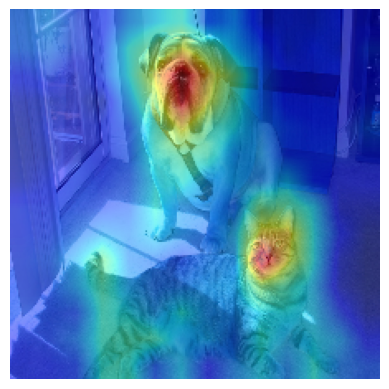

In [5]:
# Load the image and resize it
image_path = '/Users/roberto/Downloads/cat_dog.jpg'
resized_image = read_and_resize_image(image_path, size)

#Compute the signature activation
signature = signature_activation(last_conv_layer_model_cnext, resized_image[None])
intensity = cv2.resize(cv2.bilateralFilter(signature,d=2, sigmaColor=140, sigmaSpace=140), size)

# First, display the original image:
plt.imshow(resized_image)

# Now, display the heatmap. We're using the 'jet' colormap here, but you can change it to any other colormap as needed.
plt.imshow(intensity, cmap='jet', alpha=0.5)

# Hide the axes:
plt.axis('off')

# Show the result:
plt.show()


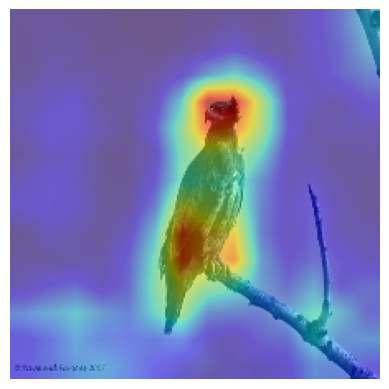

In [6]:
# Load the image and resize it
image_path = '/Users/roberto/Downloads/ILSVRC2012_img_val/ILSVRC2012_val_00000128.JPEG'
resized_image = read_and_resize_image(image_path, size)

# Compute the signature activation
signature = signature_activation(last_conv_layer_model_cnext, resized_image[None])
intensity = cv2.resize(cv2.bilateralFilter(signature,d=2, sigmaColor=140, sigmaSpace=140), size)

# First, display the original image:
plt.imshow(resized_image)

# Now, display the heatmap. We're using the 'jet' colormap here, but you can change it to any other colormap as needed.
plt.imshow(intensity, cmap='jet', alpha=0.5)

# Hide the axes:
plt.axis('off')

# Show the result:
plt.show()


/Users/roberto/miniforge3/envs/concepts/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


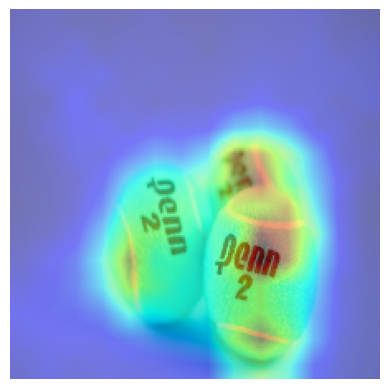

In [7]:
# Load the image and resize it
image_path = '/Users/roberto/Downloads/ILSVRC2012_img_val/ILSVRC2012_val_00000123.JPEG'
resized_image = read_and_resize_image(image_path, size)

# Compute the signature activation
signature = signature_activation(last_conv_layer_model_cnext, resized_image[None])
intensity = cv2.resize(cv2.bilateralFilter(signature,d=2, sigmaColor=140, sigmaSpace=140), size)

# First, display the original image:
plt.imshow(resized_image)

# Now, display the heatmap. We're using the 'jet' colormap here, but you can change it to any other colormap as needed.
plt.imshow(intensity, cmap='jet', alpha=0.5)

# Hide the axes:
plt.axis('off')

# Show the result:
plt.show()

/Users/roberto/miniforge3/envs/concepts/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


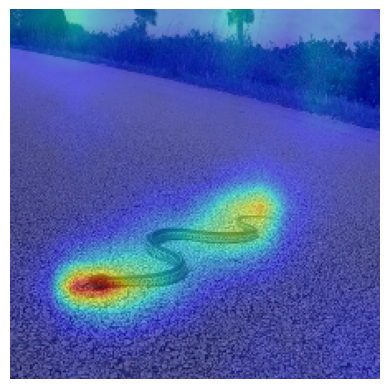

In [8]:
# Load the image and resize it
image_path = "/Users/roberto/Downloads/ILSVRC2012_img_val/ILSVRC2012_val_00000006.JPEG"
resized_image = read_and_resize_image(image_path, size)

# Compute the signature activation
signature = signature_activation(last_conv_layer_model_cnext, resized_image[None])
intensity = cv2.resize(cv2.bilateralFilter(signature,d=2, sigmaColor=140, sigmaSpace=140), size)

# First, display the original image:
plt.imshow(resized_image)

# Now, display the heatmap. We're using the 'jet' colormap here, but you can change it to any other colormap as needed.
plt.imshow(intensity, cmap='jet', alpha=0.5)

# Hide the axes:
plt.axis('off')

# Show the result:
plt.show()